In [1]:
# Importing libraries
#!pip install mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_excel('Online retail.xlsx')
data.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [3]:
data.dtypes

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    object
dtype: object

In [4]:
data.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [5]:
def txt_split(txt):
    return txt.split(',')

In [6]:
data.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [7]:
data = data['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'].apply(txt_split)
data

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, Length: 7500, dtype: object

In [8]:
te = TransactionEncoder()
encoded_df = te.fit_transform(data)

In [9]:
encoded_df

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [10]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [11]:
data = pd.DataFrame(encoded_df, columns=te.columns_)
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
data.replace([True,False],[1,0], inplace=True)
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
count = data.loc[:,:].sum()
count

 asparagus             1
almonds              152
antioxydant juice     66
asparagus             35
avocado              249
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  85
yogurt cake          205
zucchini              71
Length: 120, dtype: int64

In [14]:
count.sort_values( ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,mineral water,1787
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1229
...,...,...
115,bramble,14
116,cream,7
117,napkins,5
118,water spray,3


In [15]:
count.head(10)

,items,count
0,mineral water,1787
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1229
5,green tea,990
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


### 1. Association rule with 1% support and 80% confidence

#### Support and Length - If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [16]:
frequent_items=apriori(data, min_support=0.01,use_colnames=True)
frequent_items

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)
...,...,...
254,0.011067,"(milk, ground beef, mineral water)"
255,0.017067,"(ground beef, spaghetti, mineral water)"
256,0.015733,"(milk, spaghetti, mineral water)"
257,0.010267,"(olive oil, spaghetti, mineral water)"


In [17]:

# with 80% confidence
rules=association_rules(frequent_items,metric='lift',min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,0.003556,1.015680,0.407144
1,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068,0.420154
3,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185,0.417349
4,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,0.002777,1.018920,0.194639
...,...,...,...,...,...,...,...,...,...,...
425,"(pancakes, mineral water)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,0.005593,1.251163,0.504751
426,"(spaghetti, mineral water)",(pancakes),0.059733,0.095067,0.011467,0.191964,2.019260,0.005788,1.119917,0.536836
427,(pancakes),"(spaghetti, mineral water)",0.095067,0.059733,0.011467,0.120617,2.019260,0.005788,1.069235,0.557797
428,(spaghetti),"(pancakes, mineral water)",0.174133,0.033733,0.011467,0.065850,1.952073,0.005593,1.034381,0.590560


In [18]:
rules.sort_values(by = 'lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
236,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,0.011139,1.135402,0.772060
237,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841,0.732423
408,"(spaghetti, mineral water)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,0.011197,1.262427,0.697745
409,(ground beef),"(spaghetti, mineral water)",0.098267,0.059733,0.017067,0.173677,2.907540,0.011197,1.137893,0.727562
421,(olive oil),"(spaghetti, mineral water)",0.065733,0.059733,0.010267,0.156187,2.614731,0.006340,1.114306,0.661001
...,...,...,...,...,...,...,...,...,...,...
169,(mineral water),(french fries),0.238267,0.170933,0.033733,0.141578,0.828265,-0.006994,0.965803,-0.213960
163,(ground beef),(french fries),0.098267,0.170933,0.013867,0.141113,0.825542,-0.002930,0.965280,-0.189860
162,(french fries),(ground beef),0.170933,0.098267,0.013867,0.081123,0.825542,-0.002930,0.981343,-0.203121
173,(shrimp),(french fries),0.071333,0.170933,0.010000,0.140187,0.820126,-0.002193,0.964241,-0.191051


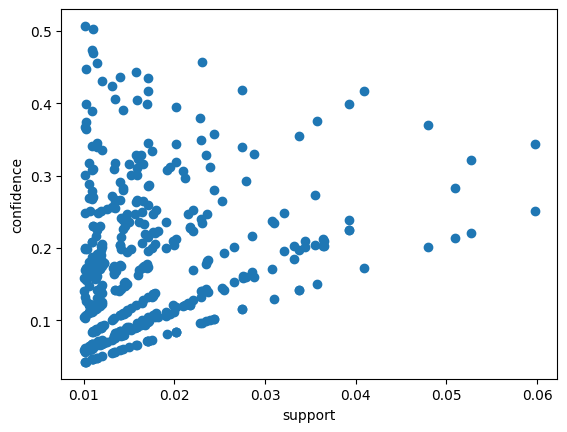

In [19]:
##### visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

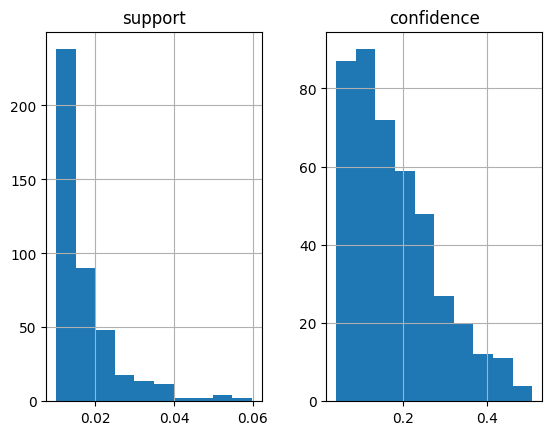

In [20]:
rules[['support','confidence']].hist()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

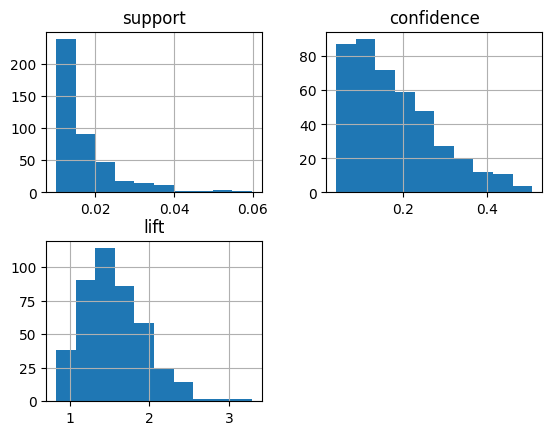

In [21]:
rules[['support','confidence','lift']].hist()

### 2. Association rule with 5% support and 70% confidence.

In [22]:
# With 5% Support
frequent_items2=apriori(data,min_support=0.05,use_colnames=True)
frequent_items2

,support,itemsets
0,0.087200,(burgers)
1,0.081067,(cake)
2,0.060000,(chicken)
3,0.163867,(chocolate)
4,0.080400,(cookies)
5,0.051067,(cooking oil)
6,0.179733,(eggs)
7,0.079333,(escalope)
8,0.170933,(french fries)
9,0.063200,(frozen smoothie)


In [23]:
# with 70% confidence
rules2=association_rules(frequent_items2,metric='lift',min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004
4,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
5,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941


In [24]:
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
5,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
2,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
3,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004


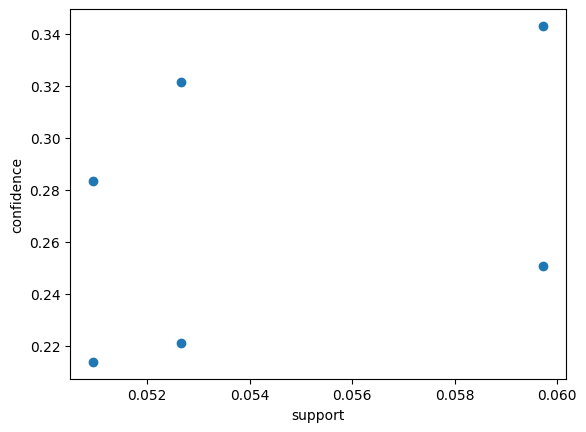

In [25]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

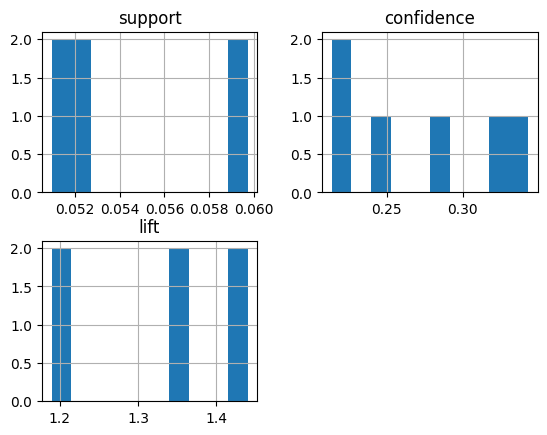

In [26]:
rules2[['support','confidence','lift']].hist()

## Interview questions

#### 1.What is lift and why is it important in Association rules?
Lift can be expressed as a term indicating how strong is the association rule. It is given by the formula {(transaction containing both antecedents and consequents)/(Transaction containing antecedents)}/(Fraction of transaction containing consequents).
Lift is used to also overcome the misleading result of confidence calculated.
It provides a way to distinguish between significant and in significant rules.
Lift value ranges from 0 to infinity, where value >=1 indicate strong association and value 1< indicate weak association.

#### 2.What is support and Confidence. How do you calculate them?
A. Support- It is a measure which gives idea of how frequent an itemset is in all the transaction. It gives the idea about the minimum threshold to consider in association rule mining. It is given by (Trnsactions containing both antecedents and consequents)/(Total number of transactions). It ranges between 0 to 1.

B. Confidence - This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents. It is given by (Trnsactions containing both antecedents and consequents)/(Total number of antecedents). Its value also ranges from 0 to 1.

#### 3.What are some limitations or challenges of Association rules mining?
Random data can generate apparently interesting association rules. The greater the rules produce, greater is the danger. rules based on large numbers of records are less subjected to this danger.

In [ ]:
scores = apriori(data,min_support=0.01, use_colnames=True)
scores

In [ ]:
rules = association_rules(scores)
rules

In [ ]:
rules.sort_values(by = 'lift', ascending=False)

##